# German Credit Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns
import math

from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# change the trees

## Loading Data

In [22]:
Datset = pd.read_csv("/Users/annikatimermanis/Desktop/project/Classification/Classification_Datasets/4_German_Credit_Data/German_Credit_Data.data-numeric", delimiter=',', header=None) 


In [34]:
df = pd.DataFrame(Datset)
df.head()

,0
0,1 6 4 12 5 5 3 4 1 67 3 ...
1,2 48 2 60 1 3 2 2 1 22 3 ...
2,4 12 4 21 1 4 3 3 1 49 3 ...
3,1 42 2 79 1 4 3 4 2 45 3 ...
4,1 24 3 49 1 3 3 4 4 53 3 ...


## Data preparation and Analysis

In [35]:
print(np.count_nonzero(Datset==np.nan))

0


In [36]:
frequency = df[0].value_counts()
print(frequency)
print("-------")

   1   6   4  12   5   5   3   4   1  67   3   2   1   2   1   0   0   1   0   0   1   0   0   1   1     1
   4  36   2  57   2   4   3   2   3  31   3   2   1   2   1   0   0   1   0   0   1   0   0   1   1     1
   2  30   0  42   1   3   2   1   3  28   3   2   1   1   1   0   0   1   0   0   1   0   0   1   1     1
   2  18   4  64   1   5   3   1   4  41   3   1   1   2   1   0   0   1   0   0   1   0   0   1   1     1
   3  12   2  13   1   3   4   4   1  23   3   1   1   1   1   0   0   1   0   1   0   0   0   1   1     1
                                                                                                        ..
   1  24   2  42   1   3   3   4   2  28   3   1   1   1   1   0   0   1   0   0   1   0   0   1   1     1
   2  10   2  15   1   3   1   2   3  31   3   1   1   1   1   0   0   1   0   0   1   0   1   0   1     1
   2  24   4  57   1   2   2   4   4  24   3   2   1   2   1   0   0   1   0   0   0   0   0   1   1     1
   1  21   2  36   1   4   2   4   3 

In [37]:
print(df.columns)
print(df.shape)

Int64Index([0], dtype='int64')
(1000, 1)


In [39]:
df.dtypes

0    object
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [42]:
# add this???
# pd_data = pd.DataFrame(data,columns =["ID", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
#                                      "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin",
#                                       "Normal Nucleoli", "Mitoses", "Class"])
# pd_data.head()

In [30]:
# plt.plot()
# plt.ylabel('Frequency')
# plt.xlabel('Class')
# plt.bar( ("1","0"), frequency)
# plt.suptitle("Distributation")
# plt.show()

In [7]:
# sns.pairplot(df, hue="Class")
# print("ok")

In [44]:
# plt.figure(figsize=(17,17))
# sns.heatmap(df.corr(), annot =True)

### Defining Dictionary of Models

In [43]:
MODELS = {'logistic_r', 'svc', 'tree', 'forest', 'knn', 'adaboost', 'gnb', 'nn'}
german_credit_data_dict = {}    

## Train and Test set

In [45]:
x = df.iloc[:,:-1]
# y = df.Class.apply(lambda x: pd.to_numeric(str(x)[2]))
y = df.iloc[:,-1:]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

In [47]:
StScale = StandardScaler()
X_train = StScale.fit_transform(X_train)
X_test = StScale.transform(X_test)

ValueError: at least one array or dtype is required

In [74]:
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def model_results(model):
    table = [["Parameters / Metrics", "Tuned"]]
    curr_model = model['model']

    if model['hyperparameters'] == 1:
        for param in curr_model.best_params_:
            table.append([param, curr_model.best_params_[param]])

    prediction = curr_model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    weighted_f1 = f1_score(y_test, prediction, average='weighted')
    macro_f1 = f1_score(y_test, prediction, average='macro')
    
    table.append(['Mean Squared Error', mse])
    table.append(['Accuracy',accuracy])
    table.append(['weighted_f1', weighted_f1])
    table.append(['macro_f1',macro_f1])

    print(tabulate(table, headers='firstrow', tablefmt='grid'))
    
    return prediction

## 1. LogisticRegression for Classification

In [75]:
logistic_r = LogisticRegression(random_state=0)
logistic_r.fit(X_train, y_train)

LogisticRegression(random_state=0)

## LogisticRegression Analysis

In [76]:
german_credit_data_dict['logistic_r'] = {'model':logistic_r, 'hyperparameters':0}
lr_prediction = model_results(german_credit_data_dict['logistic_r'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Mean Squared Error     | 0.285714 |
+------------------------+----------+
| Accuracy               | 0.714286 |
+------------------------+----------+
| weighted_f1            | 0.713375 |
+------------------------+----------+
| macro_f1               | 0.714152 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.63      0.84      0.72       101
           1       0.83      0.62      0.71       130

    accuracy                           0.71       231
   macro avg       0.73      0.73      0.71       231
weighted avg       0.74      0.71      0.71       231

[[85 16]
 [50 80]]


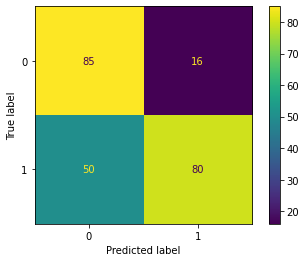

In [77]:
print(classification_report(y_test, lr_prediction))
print(confusion_matrix (y_test, lr_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, lr_prediction);

## 2. Support vector classification

In [78]:
svc = SVC().fit(X_train, y_train)

In [79]:
parameters = {
    'C':[0.1,0.01, 0.001, 0.5,0.7,1,10,50, 100,150,170,180,190, 200,220, 250,300,1000],
    'gamma': ['scale','auto',0.1, 0.01,0.02, 0.05, 0.03, 0.07, 0.001, 0.009, 0.008],
}
svc_model = RandomizedSearchCV(svc, parameters, verbose=10, random_state=0).fit(X_train, y_train)
svc_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 1/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.527 total time=   0.0s
[CV 2/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 2/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.0s
[CV 3/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 3/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.0s
[CV 4/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 4/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.0s
[CV 5/5; 1/10] START C=0.01, gamma=0.07.........................................
[CV 5/5; 1/10] END ..........C=0.01, gamma=0.07;, score=0.522 total time=   0.0s
[CV 1/5; 2/10] START C=250, gamma=0.01..........................................
[CV 1/5; 2/10] END ...........C=250, gamma=0.01;

{'gamma': 0.008, 'C': 250}

In [80]:
svc_model.best_estimator_

SVC(C=250, gamma=0.008)

## Support vector classification Analysis

In [81]:
german_credit_data_dict['svc'] = {'model':svc_model, 'hyperparameters':1}
svc_prediction = model_results(german_credit_data_dict['svc'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| gamma                  |   0.008    |
+------------------------+------------+
| C                      | 250        |
+------------------------+------------+
| Mean Squared Error     |   0.268398 |
+------------------------+------------+
| Accuracy               |   0.731602 |
+------------------------+------------+
| weighted_f1            |   0.732206 |
+------------------------+------------+
| macro_f1               |   0.731476 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.66      0.81      0.73       101
           1       0.82      0.67      0.74       130

    accuracy                           0.73       231
   macro avg       0.74      0.74      0.73       231
weighted avg       0.75      0.73      0.73       231

[[82 19]
 [43 87]]


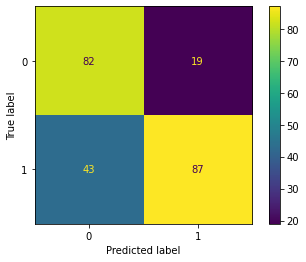

In [82]:
print(classification_report(y_test, svc_prediction))
print(confusion_matrix (y_test, svc_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, svc_prediction);

## Decision tree

In [83]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [84]:
parameters = {
    'max_depth': scipy.stats.uniform(1, 100),
    'min_samples_split': scipy.stats.uniform(0, 1) 
}
tree_model = RandomizedSearchCV(tree, parameters, verbose=1, n_iter=20, random_state=0).fit(X_train, y_train)
tree_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 55.88135039273247, 'min_samples_split': 0.7151893663724195}

## Decision tree Analysis

In [85]:
german_credit_data_dict['tree'] = {'model':tree_model, 'hyperparameters':1}
tree_prediction = model_results(german_credit_data_dict['tree'])

+------------------------+-----------+
| Parameters / Metrics   |     Tuned |
+========================+===========+
| max_depth              | 55.8814   |
+------------------------+-----------+
| min_samples_split      |  0.715189 |
+------------------------+-----------+
| Mean Squared Error     |  0.380952 |
+------------------------+-----------+
| Accuracy               |  0.619048 |
+------------------------+-----------+
| weighted_f1            |  0.606847 |
+------------------------+-----------+
| macro_f1               |  0.612947 |
+------------------------+-----------+


              precision    recall  f1-score   support

           0       0.54      0.85      0.66       101
           1       0.79      0.44      0.56       130

    accuracy                           0.62       231
   macro avg       0.67      0.64      0.61       231
weighted avg       0.68      0.62      0.61       231

[[86 15]
 [73 57]]


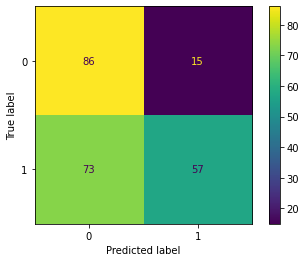

In [86]:
print(classification_report(y_test, tree_prediction))
print(confusion_matrix (y_test, tree_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, tree_prediction);

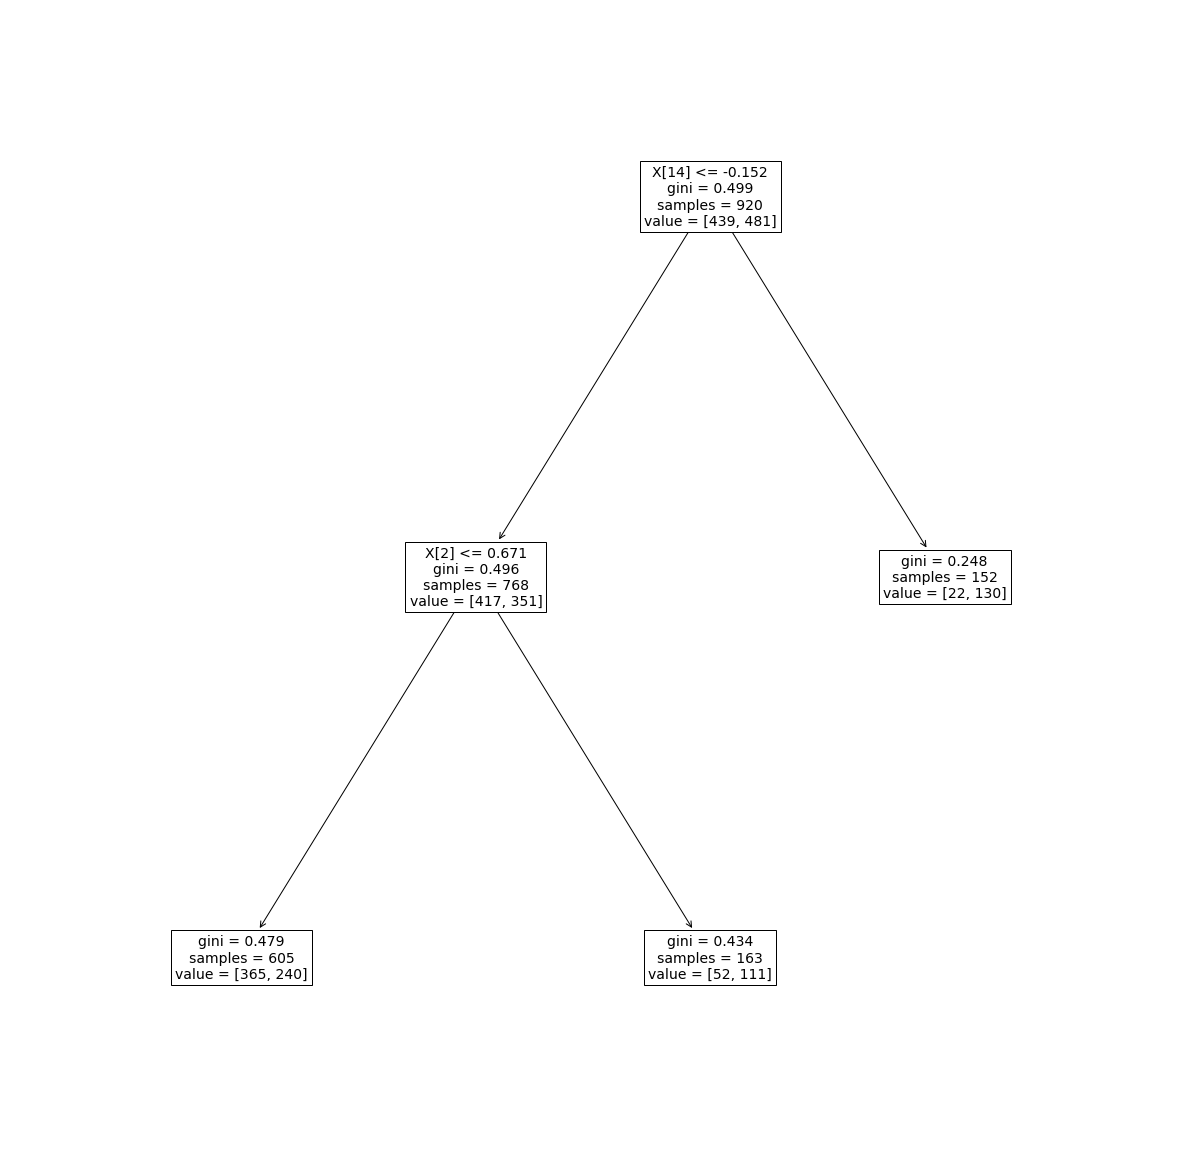

In [87]:
plt.figure(figsize=(21,21))
plot_tree(tree_model.best_estimator_, max_depth = 2, fontsize=14);

## Random Forest

## 5. K-nearest neighbours


Fitting and hyperparameter search

In [90]:
from sklearn import neighbors
import sklearn
import scipy

knn = sklearn.neighbors.KNeighborsClassifier(n_jobs=-1)

In [91]:
param_distribution = {'n_neighbors': range(1, 150), 'weights':['uniform', 'distance'], 'leaf_size': scipy.stats.uniform(1, 50)}
knn_randomized = sklearn.model_selection.RandomizedSearchCV(knn, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)

print('best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
best Hyperparameters = {'leaf_size': 34.943976505948015, 'n_neighbors': 33, 'weights': 'distance'}


In [92]:
german_credit_data_dict["knn"] = {"model":knn_randomized, "hyperparameters":1}
knn_prediction = model_results(german_credit_data_dict['knn'])

+------------------------+---------------------+
| Parameters / Metrics   | Tuned               |
+========================+=====================+
| leaf_size              | 34.943976505948015  |
+------------------------+---------------------+
| n_neighbors            | 33                  |
+------------------------+---------------------+
| weights                | distance            |
+------------------------+---------------------+
| Mean Squared Error     | 0.36796536796536794 |
+------------------------+---------------------+
| Accuracy               | 0.6320346320346321  |
+------------------------+---------------------+
| weighted_f1            | 0.6299910320399279  |
+------------------------+---------------------+
| macro_f1               | 0.6315927725763176  |
+------------------------+---------------------+


              precision    recall  f1-score   support

           0       0.56      0.76      0.64       101
           1       0.74      0.53      0.62       130

    accuracy                           0.63       231
   macro avg       0.65      0.65      0.63       231
weighted avg       0.66      0.63      0.63       231

[[77 24]
 [61 69]]


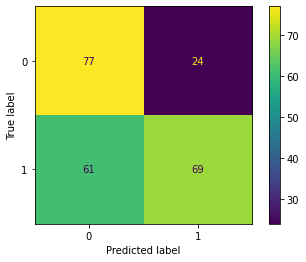

In [95]:
print(classification_report(y_test, knn_prediction))
print(confusion_matrix (y_test, knn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction);

## 6. AdaBoost Classification

Fitting and Hyperparameter search 

In [96]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier().fit(X_train,y_train)

In [97]:
param_distribution = {'n_estimators': range(1, 250), 'learning_rate': scipy.stats.uniform(.1, 5)}
adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=5, n_iter=50).fit(X_train, y_train)

print('Best Hyperparameters = ' + str(adaBoost_randomized.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters = {'learning_rate': 0.8948479182275986, 'n_estimators': 142}


In [98]:
german_credit_data_dict["adaboost"] = {"model":adaBoost_randomized, "hyperparameters":1}
adaboost_prediction = model_results(german_credit_data_dict['adaboost'])

+------------------------+------------+
| Parameters / Metrics   |      Tuned |
+========================+============+
| learning_rate          |   0.894848 |
+------------------------+------------+
| n_estimators           | 142        |
+------------------------+------------+
| Mean Squared Error     |   0.294372 |
+------------------------+------------+
| Accuracy               |   0.705628 |
+------------------------+------------+
| weighted_f1            |   0.706478 |
+------------------------+------------+
| macro_f1               |   0.705357 |
+------------------------+------------+


              precision    recall  f1-score   support

           0       0.63      0.77      0.70       101
           1       0.79      0.65      0.71       130

    accuracy                           0.71       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.72      0.71      0.71       231

[[78 23]
 [45 85]]


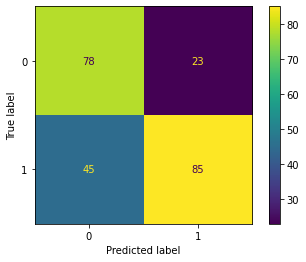

In [99]:
print(classification_report(y_test, adaboost_prediction))
print(confusion_matrix (y_test, adaboost_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_prediction);

## 7. Gaussian Naive Bayes classification

In [100]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB().fit(X_train, y_train)

In [ ]:
# param_distribution = {'n_estimators': range(1, 150), 'learning_rate': scipy.stats.reciprocal(1, 5)}
# adaBoost_randomized = sklearn.model_selection.RandomizedSearchCV(adaBoost, param_distribution, verbose=1, random_state=0, cv=3, n_iter=250).fit(X_train, y_train)
# print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

In [101]:
german_credit_data_dict["gnb"] = {"model":naive_bayes, "hyperparameters":0}
naive_bayes_prediction = model_results(german_credit_data_dict['gnb'])

+------------------------+----------+
| Parameters / Metrics   |    Tuned |
+========================+==========+
| Mean Squared Error     | 0.393939 |
+------------------------+----------+
| Accuracy               | 0.606061 |
+------------------------+----------+
| weighted_f1            | 0.607531 |
+------------------------+----------+
| macro_f1               | 0.603654 |
+------------------------+----------+


              precision    recall  f1-score   support

           0       0.54      0.60      0.57       101
           1       0.66      0.61      0.63       130

    accuracy                           0.61       231
   macro avg       0.60      0.61      0.60       231
weighted avg       0.61      0.61      0.61       231

[[61 40]
 [51 79]]


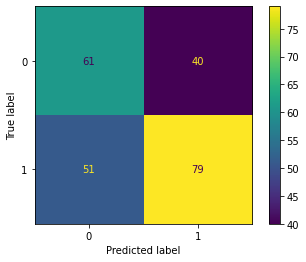

In [102]:
print(classification_report(y_test, naive_bayes_prediction))
print(confusion_matrix (y_test, naive_bayes_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, naive_bayes_prediction);

## 8. Neural Network classification

In [104]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=900)

In [105]:
param_distribution = {'max_iter': range(1000, 1500),
                        'alpha': scipy.stats.reciprocal(0.00001, 0.1), 
                        'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_randomized = sklearn.model_selection.RandomizedSearchCV(mlp, param_distribution, verbose=1, random_state=0, cv=3, n_iter=25).fit(X_train, y_train)
print('Best Hyperparameters = ' + str(knn_randomized.best_params_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Hyperparameters = {'leaf_size': 34.943976505948015, 'n_neighbors': 33, 'weights': 'distance'}


In [106]:
german_credit_data_dict["nn"] = {"model":mlp_randomized, "hyperparameters":1}
nn_prediction = model_results(german_credit_data_dict['nn'])

+------------------------+-----------------------+
| Parameters / Metrics   | Tuned                 |
+========================+=======================+
| alpha                  | 0.0025766385746135885 |
+------------------------+-----------------------+
| learning_rate          | invscaling            |
+------------------------+-----------------------+
| max_iter               | 1211                  |
+------------------------+-----------------------+
| Mean Squared Error     | 0.26406926406926406   |
+------------------------+-----------------------+
| Accuracy               | 0.7359307359307359    |
+------------------------+-----------------------+
| weighted_f1            | 0.7354463625552913    |
+------------------------+-----------------------+
| macro_f1               | 0.7307640865926592    |
+------------------------+-----------------------+


              precision    recall  f1-score   support

           0       0.70      0.68      0.69       101
           1       0.76      0.78      0.77       130

    accuracy                           0.74       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.74      0.74      0.74       231

[[ 69  32]
 [ 29 101]]


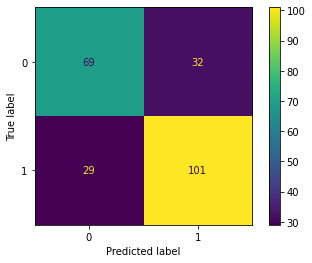

In [107]:
print(classification_report(y_test, nn_prediction))
print(confusion_matrix (y_test, nn_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, nn_prediction);